<h5>Импорт библиотек</h5>

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

<h5>Загрузка словаря с предметами</h5>

In [2]:
stuffdict = {'couch_s':(300,75), 
             'couch_b':(500,80), 
             'bed':(400,100), 
             'closet':(200,50), 
             'bed_s':(200,40), 
             'desk':(200,70), 
             'table':(300,80),
             'tv_table':(200,30),
             'armchair':(100,30),
             'bookshelf':(200,60), 
             'cabinet':(150,20),
             'game_table':(150,30),
             'hammock':(250,45),
             'diner_table_with_chairs':(250,70),
             'stools':(150,30),
             'mirror':(100,20),
             'instrument':(300,70),
             'plant_1':(25,10),
             'plant_2':(30,20),
             'plant_3':(45,25),
             'sideboard':(175,30),
             'chest_of_drawers':(25,40),
             'guest_bed':(250,40),
             'standing_lamp':(20,30), 
             'garbage_can':(30,35), 
             'bar_with_stools':(200,40), 
             'bike_stand':(100,80),
             'chest':(150,25),
             'heater':(100,25)
            }

<b><h5>1 вариант решения</h5></b>

<h5>Создаём списки значений площади и ценности</h5>

In [3]:
def get_area_and_value(stuffdict):
    area = [stuffdict[item][0] for item in stuffdict]
    value = [stuffdict[item][1] for item in stuffdict]        
    return area, value

<h5>Используем списки для мемоизации</h5>

In [4]:
def get_memtable(stuffdict, A=2000):
      area, value = get_area_and_value(stuffdict)
      n = len(value) # находим размеры таблицы
      
      # создаём таблицу из нулевых значений
      V = [[0 for a in range(A+1)] for i in range(n+1)]

      for i in range(n+1):
            for a in range(A+1):
                  # базовый случай
                  if i == 0 or a == 0:
                        V[i][a] = 0

                  # если площадь предмета меньше площади столбца,
                  # максимизируем значение суммарной ценности
                  elif area[i-1] <= a:
                        V[i][a] = max(value[i-1] + V[i-1][a-area[i-1]], V[i-1][a])

                  # если площадь предмета больше площади столбца,
                  # забираем значение ячейки из предыдущей строки
                  else:
                        V[i][a] = V[i-1][a]  
  
      return V, area, value

<h5>Забираем нужные элементы из последней строки таблицы</h5>

In [5]:
def get_selected_items_list(stuffdict, A=2000):
      V, area, value = get_memtable(stuffdict)
      n = len(value)
      res = V[n][A]      # начинаем с последнего элемента таблицы
      a = A              # начальная площадь - максимальная
      items_list = []    # список площадей и ценностей
    
      for i in range(n, 0, -1):  # идём в обратном порядке
            if res <= 0:  # условие прерывания - собрали "рюкзак" 
                  break
            if res == V[i-1][a]:  # ничего не делаем, двигаемся дальше
                  continue
            else:
                  # "забираем" предмет
                  items_list.append((area[i-1], value[i-1]))
                  res -= value[i-1]   # отнимаем значение ценности от общей
                  a -= area[i-1]  # отнимаем площадь от общей
            
      selected_stuff = []

      # находим ключи исходного словаря - названия предметов
      for search in items_list:
            for key, value in stuffdict.items():
                  if value == search:
                        selected_stuff.append(key)
            
      return selected_stuff

<h5>Проверяем сумарную площадь и ценность предметов</h5>

In [6]:
start_time = time.time()
stuff = get_selected_items_list(stuffdict)
totarea = sum([stuffdict[item][0] for item in stuff])
totvalue = sum([stuffdict[item][1] for item in stuff])

end_time = time.time()
execution_time_1 = end_time - start_time

print(f"Время выполнения: {execution_time_1} секунд")


Время выполнения: 0.02112102508544922 секунд


<h5>Найденный список предметов</h5>

In [7]:
stuff

['bike_stand',
 'garbage_can',
 'standing_lamp',
 'chest_of_drawers',
 'plant_3',
 'plant_2',
 'diner_table_with_chairs',
 'bookshelf',
 'armchair',
 'table',
 'desk',
 'bed',
 'couch_s']

<h5>Сумарная площадь и ценность</h5>

In [8]:
totarea

2000

In [9]:
totvalue

715

<h5>Тепловая карта таблицы</h5>

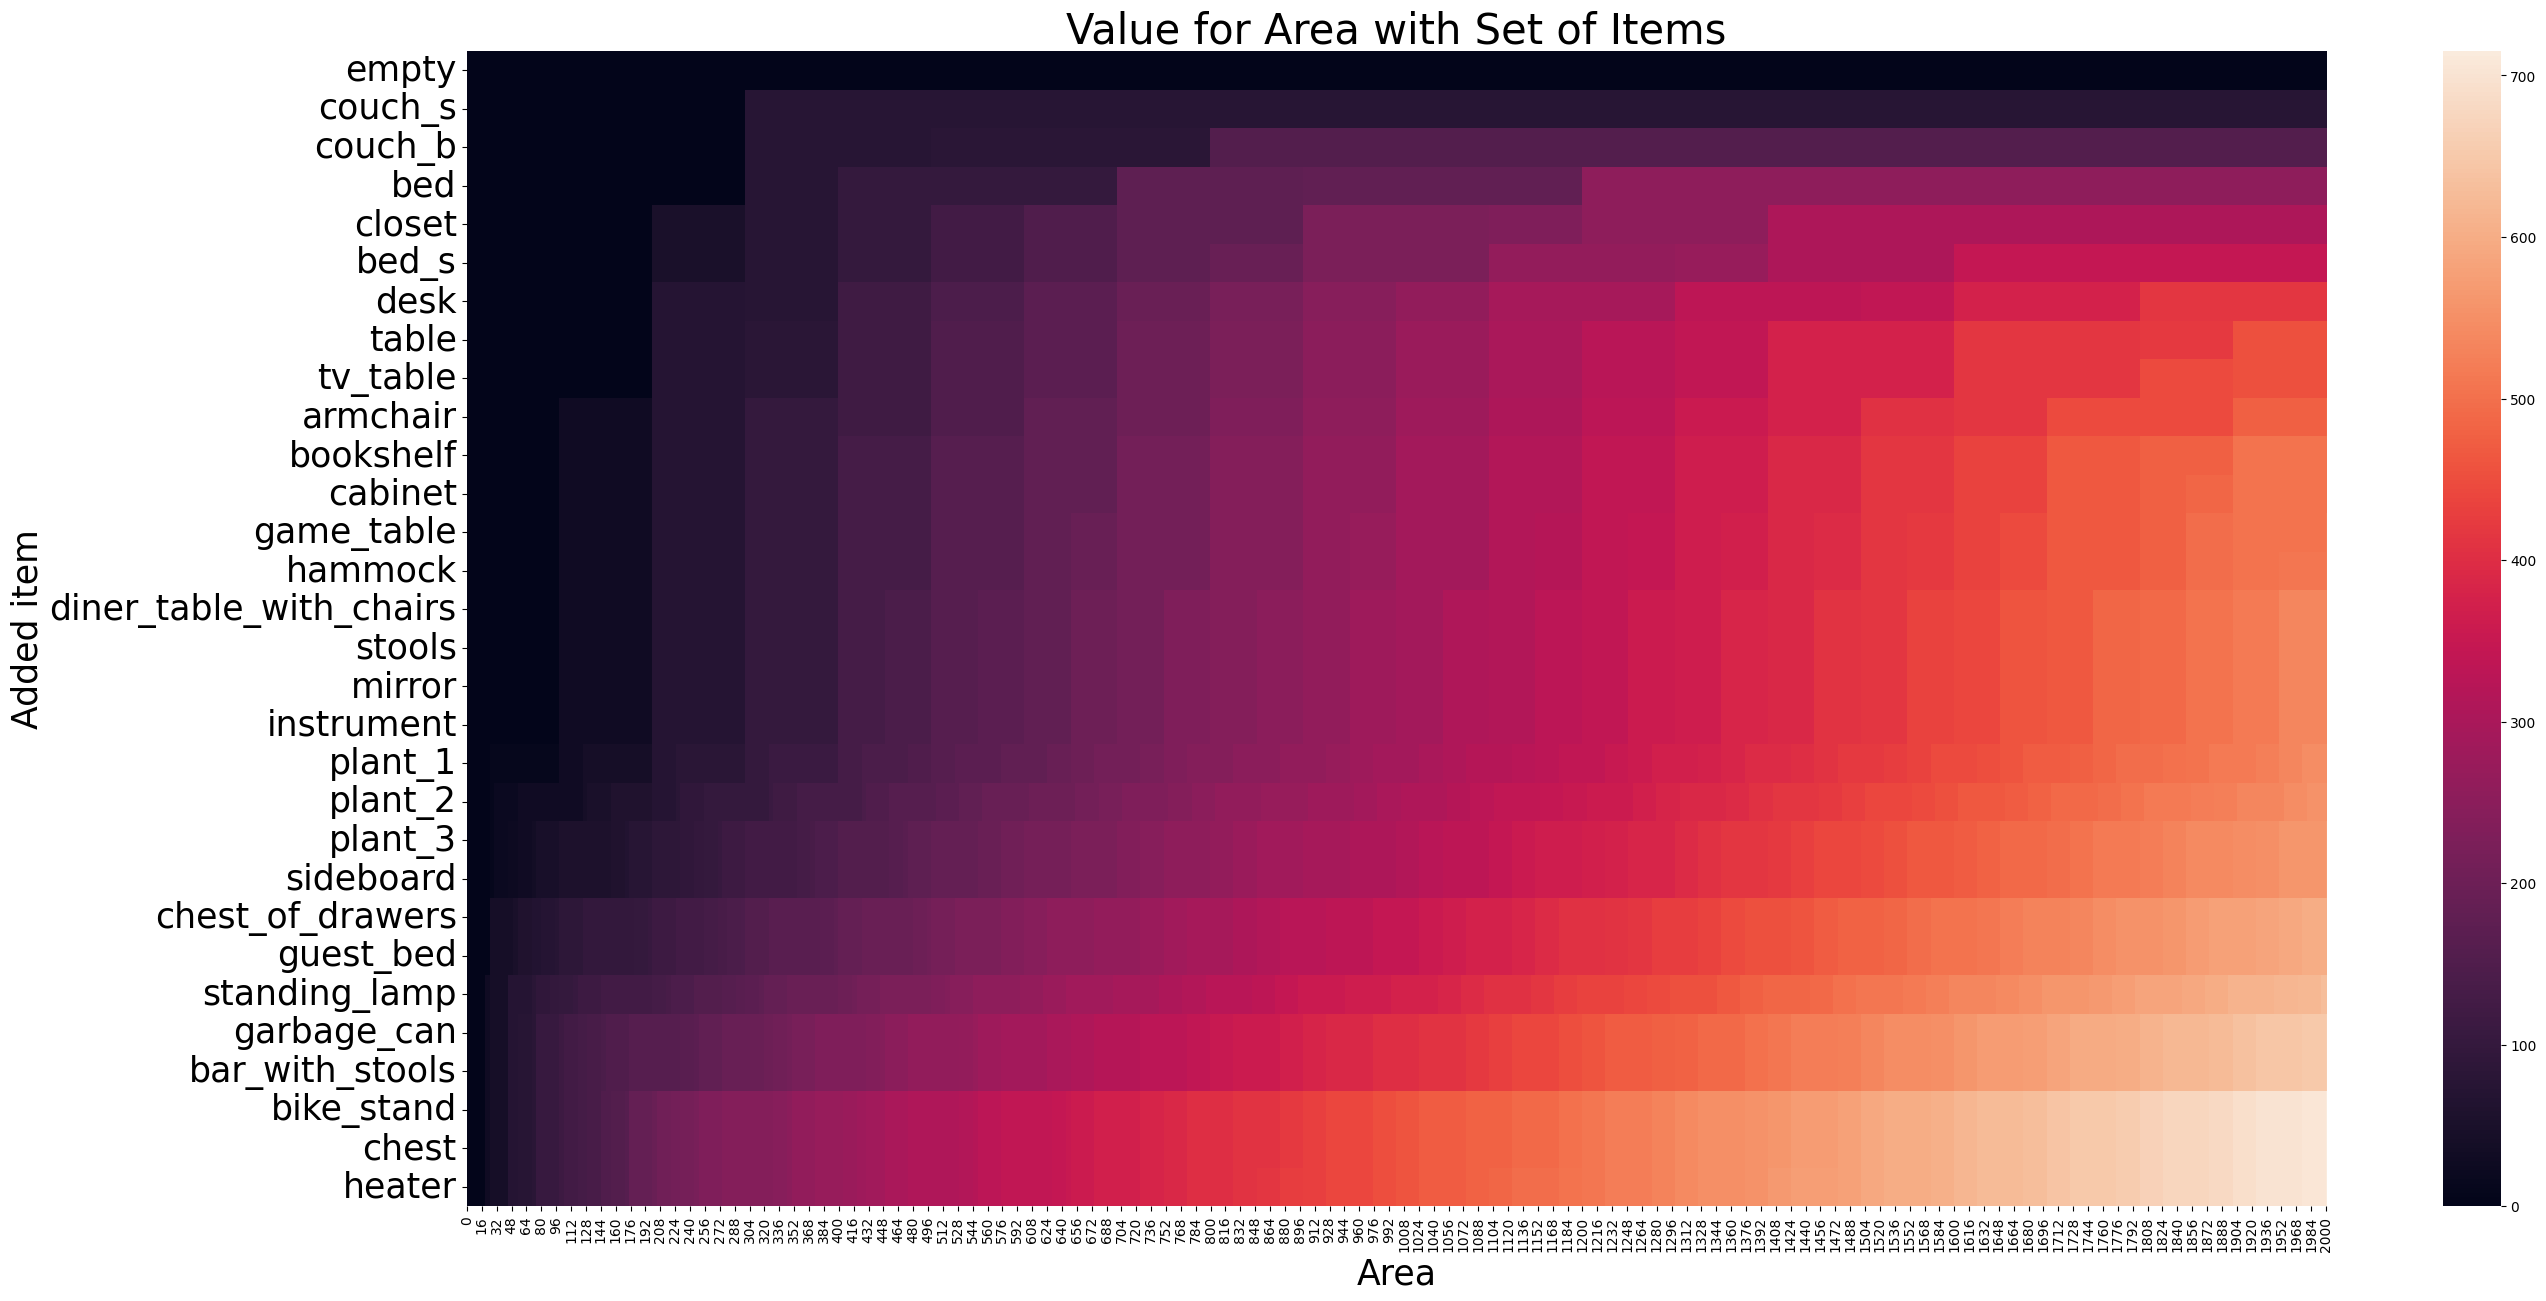

In [10]:
def plot_memtable(V, stuffdict):
    plt.figure(figsize=(30,15))
    item_list = list(stuffdict.keys())
    item_list.insert(0, 'empty')
    sns.heatmap(V, yticklabels=item_list)
    plt.yticks(size=25)
    plt.xlabel('Area', size=25)
    plt.ylabel('Added item', size=25)
    plt.title('Value for Area with Set of Items', size=30)
    plt.show()

V, area, value = get_memtable(stuffdict)
plot_memtable(V, stuffdict)

<h5>Вариант 2</h5>

In [11]:
def knapsack(cap, values, weights):
    num_items = len(values)
    if num_items != len(weights):
        raise ValueError("Число значений и весов должно быть одинаковым")

    max_value = [0] * (cap + 1)

    for i in range(1, num_items + 1):
        for w in range(cap, 0, -1):
            if weights[i - 1] <= w:
                max_value[w] = max(max_value[w], max_value[w - weights[i - 1]] + values[i - 1])

    return max_value[cap]

In [12]:
start_time = time.time()

cap = 2000  
values  = [stuffdict[item][1] for item in stuffdict]
weights = [stuffdict[item][0] for item in stuffdict]

result = knapsack(cap, values, weights)
print("Максимальная ценность, которую вы можете унести в рюкзаке:", result)

end_time = time.time()
execution_time = end_time - start_time

print(f"Время выполнения: {execution_time} секунд")

Максимальная ценность, которую вы можете унести в рюкзаке: 715
Время выполнения: 0.01874256134033203 секунд


<h5>Тепловая карта</h5>

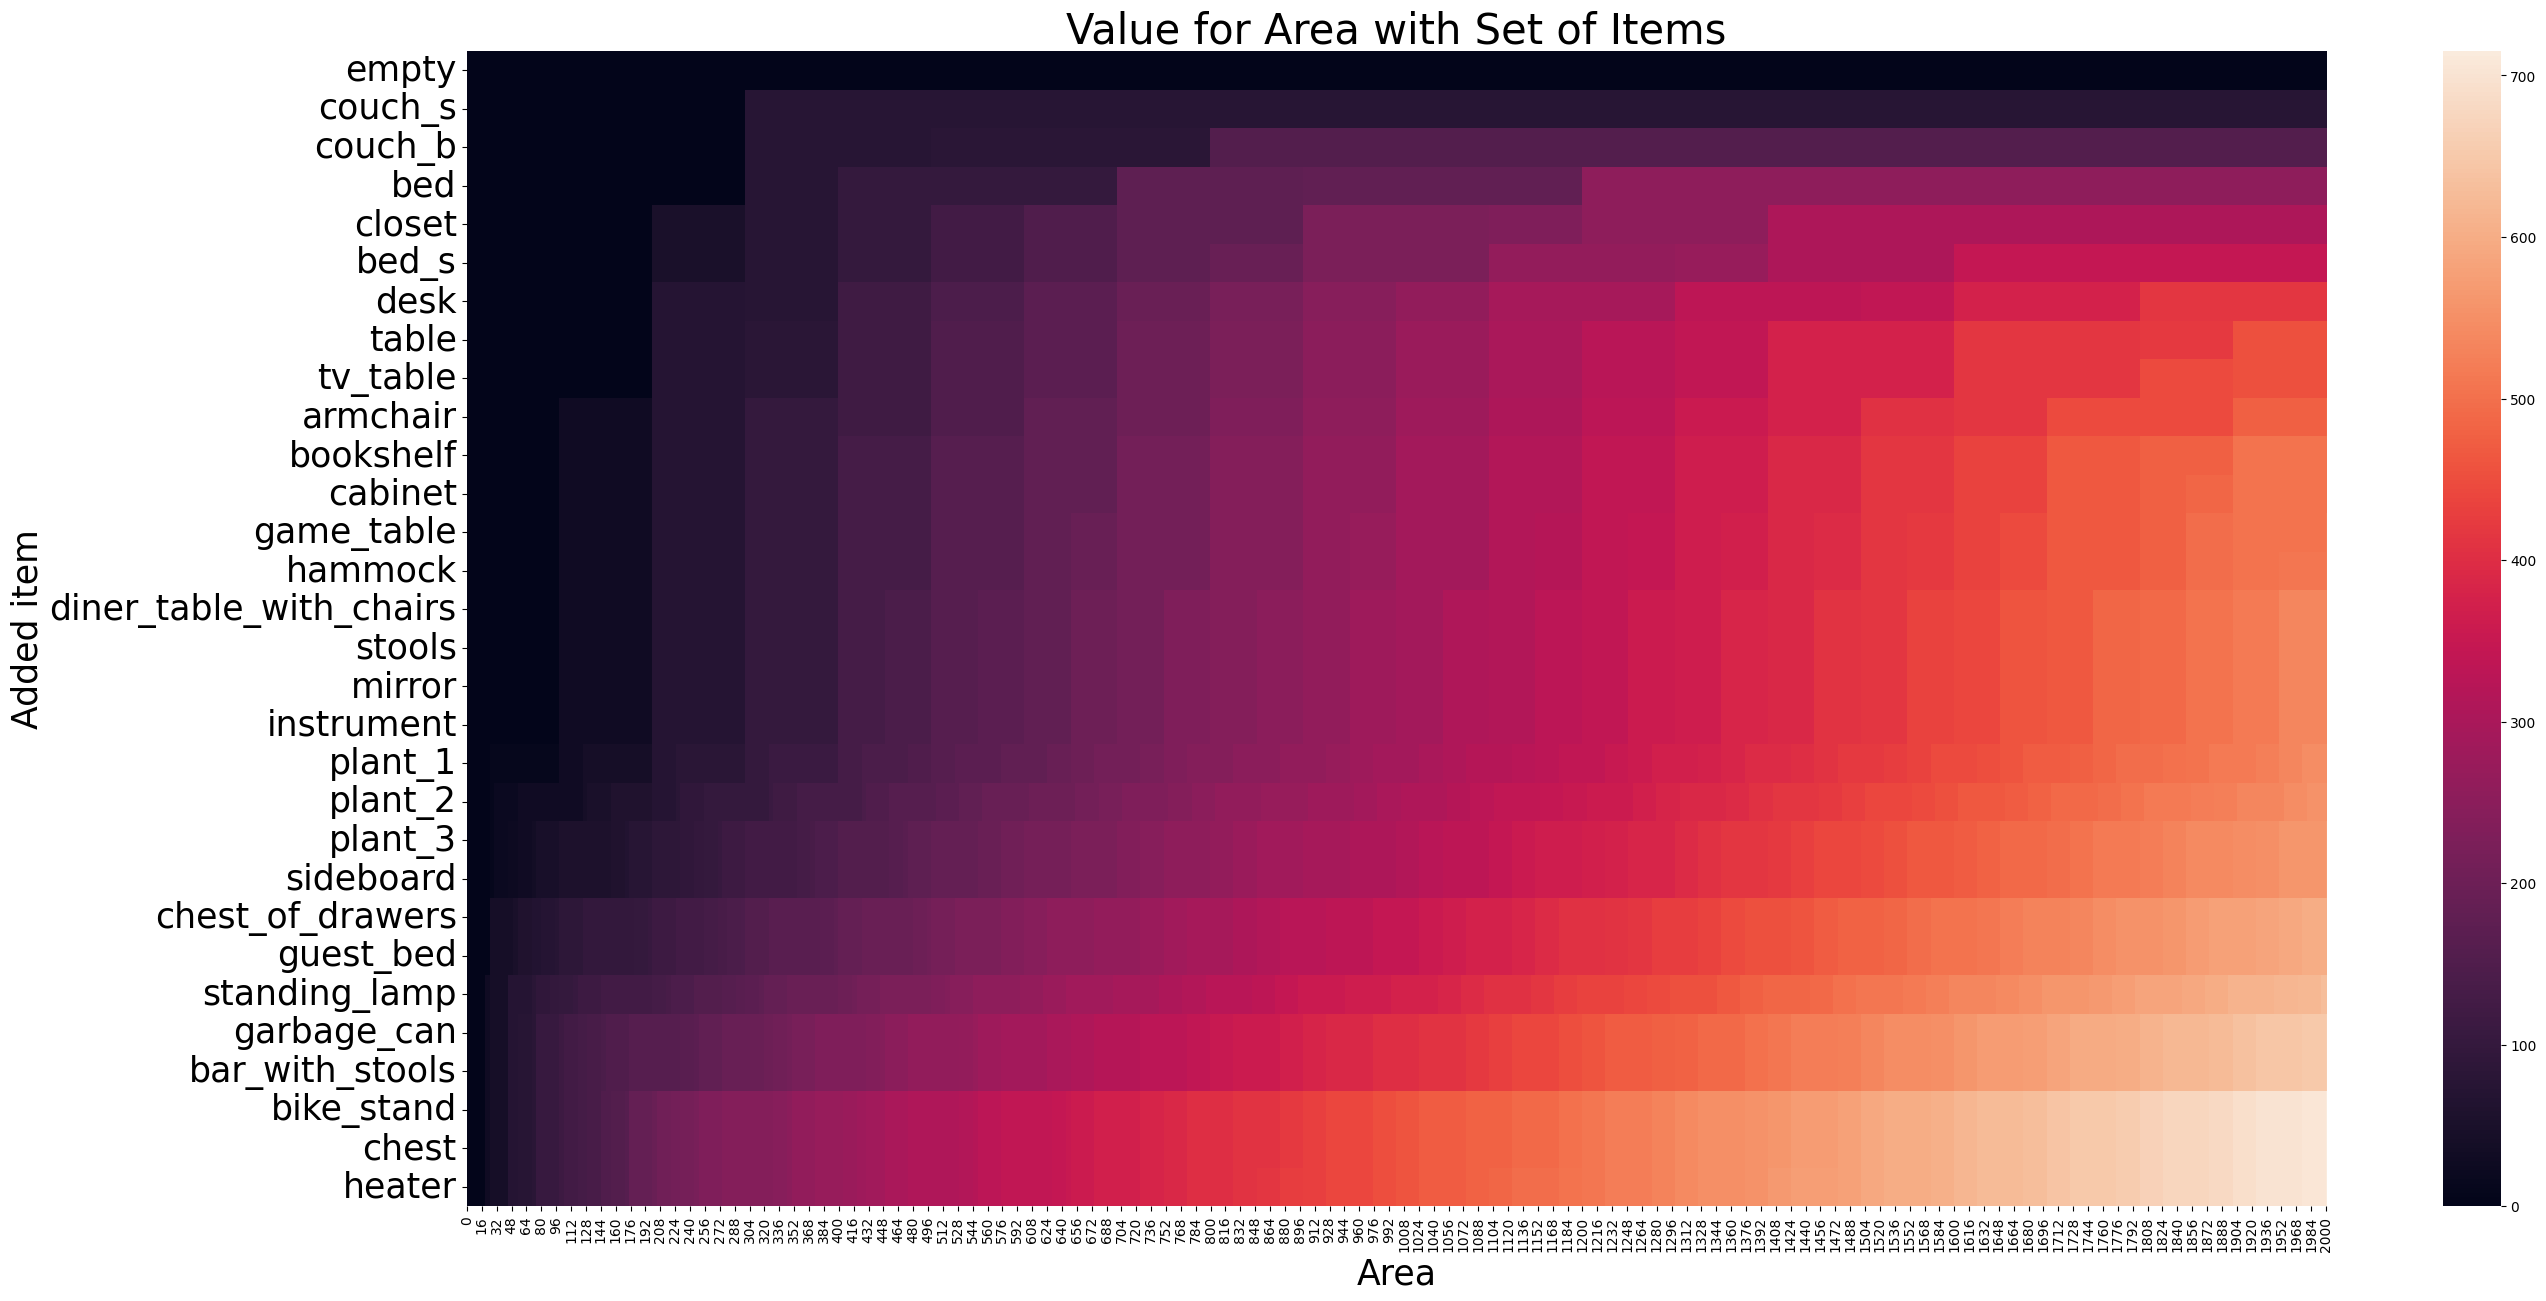

In [13]:
def plot_memtable(cap, values, weights, stuffdict):
    n = len(values)
    V = [[0 for _ in range(cap + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, cap + 1):
            if weights[i - 1] <= w:
                V[i][w] = max(V[i - 1][w], V[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                V[i][w] = V[i - 1][w]

    plt.figure(figsize=(30,15))
    item_list = list(stuffdict.keys())
    item_list.insert(0, 'empty')
    sns.heatmap(V, yticklabels=item_list)
    plt.yticks(size=25)
    plt.xlabel('Area', size=25)
    plt.ylabel('Added item', size=25)
    plt.title('Value for Area with Set of Items', size=30)
    plt.show()

plot_memtable(cap, values, weights, stuffdict)

<h5>Сравнение времени выполнение и результатов<h5>

In [14]:
print('1 Алгоритм: ')
print(f'Время выполнения: {execution_time_1}')
print(f'Выведенный ответ: {totvalue} ')
print('2 Алгоритм: ')
print(f'Время выполнения: {execution_time} ')
print(f'Выведенный ответ: {result} ')

1 Алгоритм: 
Время выполнения: 0.02112102508544922
Выведенный ответ: 715 
2 Алгоритм: 
Время выполнения: 0.01874256134033203 
Выведенный ответ: 715 


<h5>Из результатов следует сделать вывод, что 2 алгоритм справляется быстрее, чем первый. Также, в статье указан неверный алгоритм, т.к. учитывается в подсчете только деление без остатка. Исправлено.</h5>